# 任务四：归并排序和基数排序

**实现基本功能**：

　（1）归并排序（Merging Sort）（难度：★★★★）
 
　（2）基数排序（Radix Sort）（难度：★★★★）

## 1. 归并排序

　　归并排序（Merging Sort）就是将两个或两个以上的有序表合并成一个有序表的过程。将两个有序表合并成一个有序表的过程成为2-路归并，2-路归并最为简单和常用。

### 1.1 相邻两个有序子序列的归并

![Image Name](https://cdn.kesci.com/upload/image/qxpsnavt2q.png)
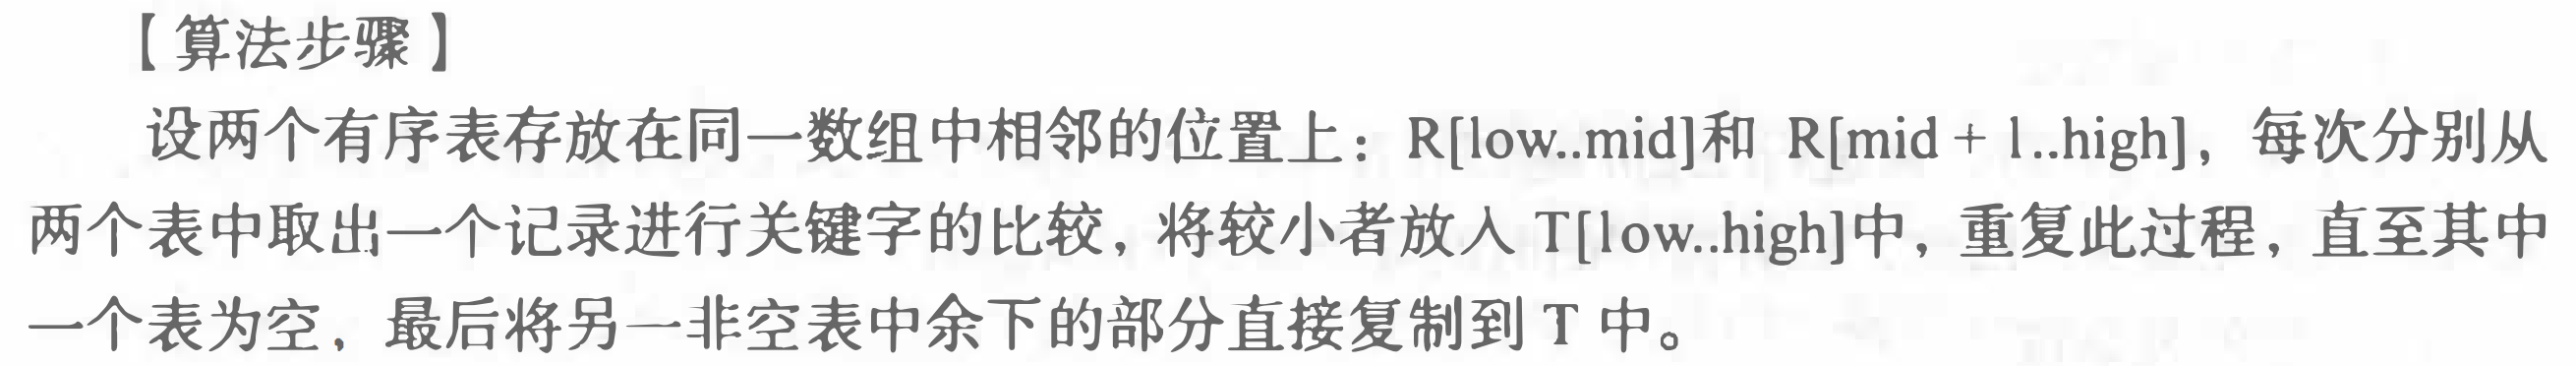

In [1]:
def Merge(R, T, low, mid, high):
    # 将有序表R[low..mid]和R[mid+1..high]归并为有序表T[low..high]
    i = low
    j = mid + 1
    k = low
    # 将R中记录由小到大地并入T中
    while i <= mid and j <= high:
        if R[i] <= R[j]:
            T[k] = R[i]
            i += 1
        else:
            T[k] = R[j]
            j += 1
        k += 1
    # 将剩余的R[i..mid]复制到T中
    while i <= mid:
        T[k] = R[i]
        k += 1
        i += 1
    # 将剩余的R[j..high]复制到T中
    while j <= high:
        T[k] = R[j]
        k += 1
        j += 1

### 1.2 归并排序

![Image Name](https://cdn.kesci.com/upload/image/qxpsngknjy.png)
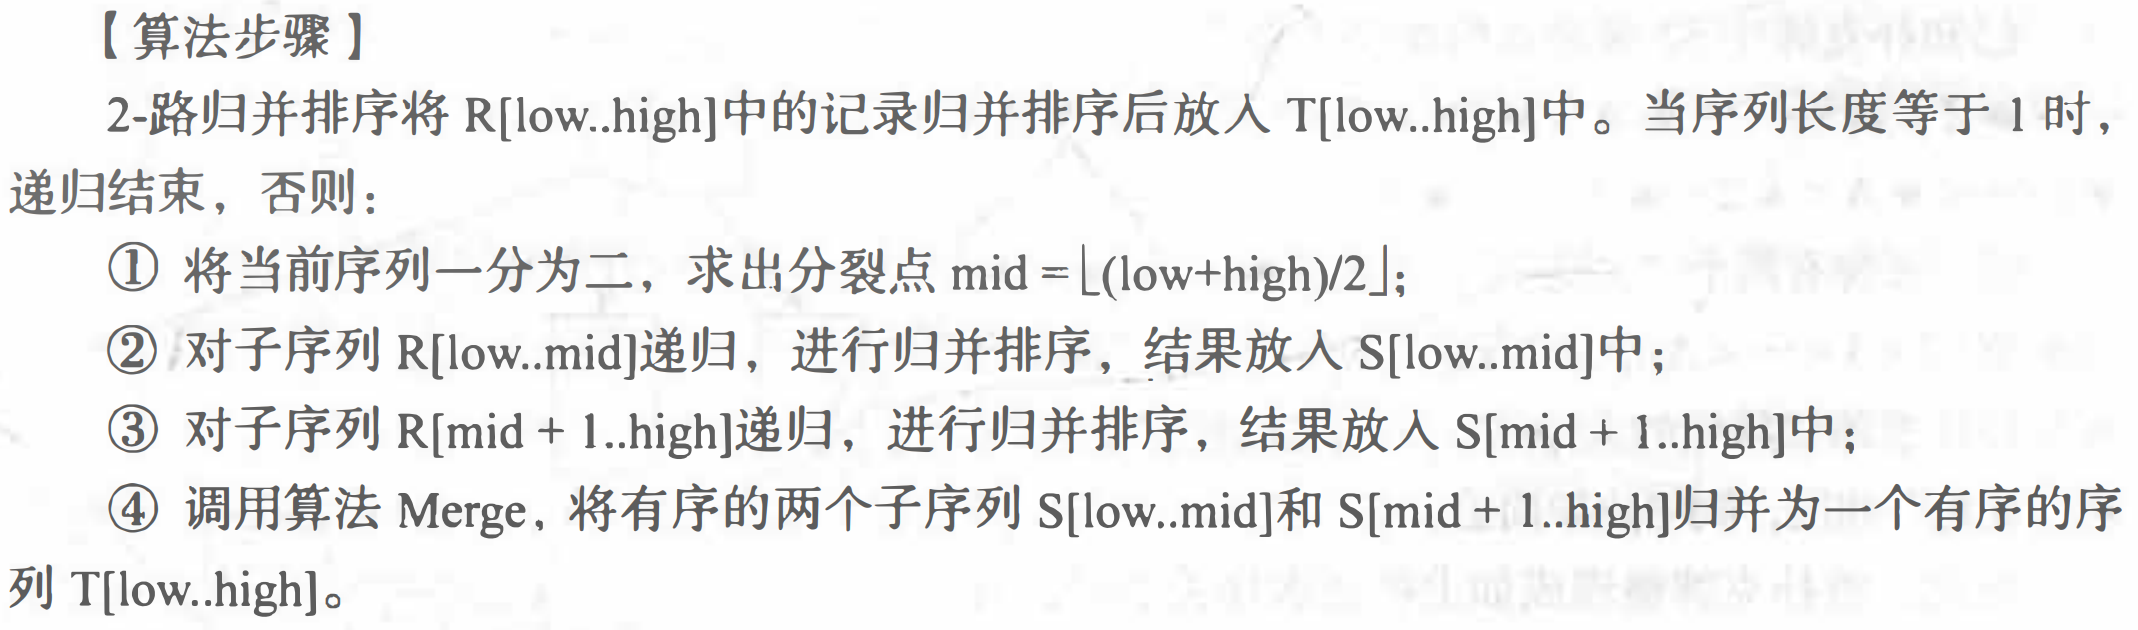

In [2]:
## R[low..high]归并排序后放入T[low..high]中
def MSort(R, T, low, high):
    if low == high:
        T[low] = R[low]
    else:
        S = T.copy()
        mid = int((low+high)/2) # 将当前序列一分为二，求出分裂点mid
        MSort(R, S, low, mid) # 将子序列R[low..mid]递归归并排序，结果放入S[low.high]
        MSort(R, S, mid+1, high) # 将子序列R[mid+1..high]递归归并排序，结果放入S[mid+1..high]
        Merge(S, T, low, mid, high) #将S[low..mid]和S[mid+1..high]归并到T[low..high]

## 对顺序表进行归并排序
def MergeSort(sqlist):
    R = sqlist.copy()
    T = sqlist.copy()
    MSort(R, T, 0, len(sqlist)-1)
    return T

### 1.3 测试

In [3]:
sqlist = [49, 38, 65, 97, 76, 13, 27]
print(" 原始序列：", sqlist)
print("排序后序列：", MergeSort(sqlist))

 原始序列： [49, 38, 65, 97, 76, 13, 27]
排序后序列： [13, 27, 38, 49, 65, 76, 97]


## 2. 基数排序

　　基数排序的思想类似千上述"最低位优先法"的洗牌过程， 是借助"分配"和"收集"两种操作对单逻辑关键字进行排序的一种内部排序方法。有的逻辑关键字可以看成由若干个关键字复合而成的。
  
　　假设记录的逻辑关键字由d个"关键字"组成，每个关键字可能取rd个值。只要从最低数位关键字起，按关键字的不同值将序列中记录"分配"到rd个队列中后再"收集"之，如此重复d次完成排序。按这种方法实现排序称之为基数排序。
	
　　算法步骤：
	
![Image Name](https://cdn.kesci.com/upload/image/qxpslbw6me.png)

### 2.1 定义队列类

In [4]:
## 定义队列类
class Queue:
    def __init__(self):
        self.items = []
 
    def isEmpty(self):
        return self.items == []
 
    def enqueue(self, item):
        self.items.insert(0,item)
 
    def dequeue(self):
        return self.items.pop()
 
    def size(self):
        return len(self.items)

### 2.2 处理输入数据

In [5]:
# 处理输入数据:将列表数字设置成相同位数的字符串
def change_sqlist(sqlist):
    max_lengh = max([len(sqlist[i]) for i in range(len(sqlist))])  # 查询记录中最长的字符串
    return [x.zfill(max_lengh) for x in sqlist]  # 将每一个记录都通过添加前导0的方式转化为一样的长度

### 2.3 基数排序函数

In [6]:
# 基数排序
def radixSort(sqlist):
    source_data = change_sqlist(sqlist)  # 输入处理
    res = []  # 用于保存结果列表
    big_queue = Queue()  # 用于转化的队列
    for ele in source_data:
        big_queue.enqueue(ele)

    for i in range(len(source_data[0])-1,-1,-1):
        buckets = []  # 用于保存每一趟的10各基数桶
        for num  in range(10):  # 建立10个基数桶
            bucket = Queue()
            buckets.append(bucket)
            
        # 在基数桶中插入数据
        while not big_queue.isEmpty():
            currentEle = big_queue.dequeue()  # 大队列中出队一个元素
            index = int(currentEle[i])  # 根据元素对应位上的值添加进对应的基数桶中
            buckets[index].enqueue(currentEle)

        # 把基数桶串联起来
        new_big_queue = Queue()
        for bucket in buckets:
            while not bucket.isEmpty():
                out = bucket.dequeue()
                new_big_queue.enqueue(out)
                
        # 修改big_queue
        big_queue = new_big_queue
        
    # 将大队列中的元素保存到结果列表中
    while not big_queue.isEmpty():
        res.append(big_queue.dequeue().lstrip('0'))  # 利用lstrip('0')去掉前导0
    return res

### 2.2 测试

In [7]:
list_ = [278, 109, 63, 93, 589, 184, 505, 269, 8, 83]
sqlist = [str(i) for i in list_]
print(" 原始序列：", list_)
print("排序后序列：", [int(num) for num in radixSort(sqlist)])

 原始序列： [278, 109, 63, 93, 589, 184, 505, 269, 8, 83]
排序后序列： [8, 63, 83, 93, 109, 184, 269, 278, 505, 589]
